# Análise Exporatória

___
## Índice

- [Questão 1](#q1)
    - [Item a](#q1_a)
    - [Item b](#q1_b)
    - [Item c](#q1_c)
    - [Item d](#q1_d)
    - [Item e](#q1_e)
- [Questão 2](#q2)
    - [Item a](#q2_a)
    - [Item b](#q2_b)
- [Questão 3](#q3)
    - [Item a](#q3_a)
    - [Item b](#q3_b)
    - [Item c](#q3_c)
    - [Item d](#q3_d)
- [Questão 4](#q4)
    - [Item a](#q4_a)
    - [Item b](#q4_b)
    - [Item c](#q4_c)
___

In [822]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div id="q1"></div>
    
    
# Questão 1

___



<img src="arquivos/img/spotify_logo2.png" width=33% alt="Fonte: https://commons.wikimedia.org/wiki/File:Spotify_Premium_stored-value_cards,_ALDI_Winschoten_(2019).jpg"> </img>


Um competidor do Kaggle, George McIntire, que se diz ser apaixonado por músicas, ficou curioso para saber porquê ele gosta das músicas que ele gosta. 
Com isso, ele construiu um conjunto de dados de músicas de 2017 obtido via API do Spotify e rotulou cada música como *"Like"*, o que significa que ele gosta e *"Dont Like"* para músicas que não gosta. 

*Fonte: Textos extraídos e/ou adaptados de [https://www.kaggle.com/geomack/spotifyclassification]([https://www.kaggle.com/geomack/spotifyclassification]).*

Consulte o dicionario de dados no link [Dicionário de dados](./arquivos/Q1_DicioSpotify.pdf) antes de resolver os itens a seguir.


In [823]:
dados_1 = pd.read_excel("arquivos/Q1_Spotify_CD.xlsx")

In [824]:
dados_1.head(3)

,music_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_title,artist,liking
0,0,0.0102,0.833,204600,0.434,0.021900,0.165,-8.795,0.4310,150.062,0.286,Mask Off,Future,Like
1,1,0.1990,0.743,326933,0.359,0.006110,0.137,-10.401,0.0794,160.083,0.588,Redbone,Childish Gambino,Dont Like
2,2,0.0344,0.838,185707,0.412,0.000234,0.159,-7.148,0.2890,75.044,0.173,Xanny Family,Future,Like


In [825]:
dados_1.liking = dados_1.liking.astype('category')

In [826]:
dados_1.columns

Index(['music_id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'song_title', 'artist', 'liking'],
      dtype='object')


**A seção a seguir contém uma análise das variáveis  `energy` e  `liking`, por favor faça:**

<div id="q1_a"></div>

---
**a)** Construa um histograma de densidade de frequências da variável `energy` separadamente para cada categoria de `liking`.


**Resposta a partir daqui**

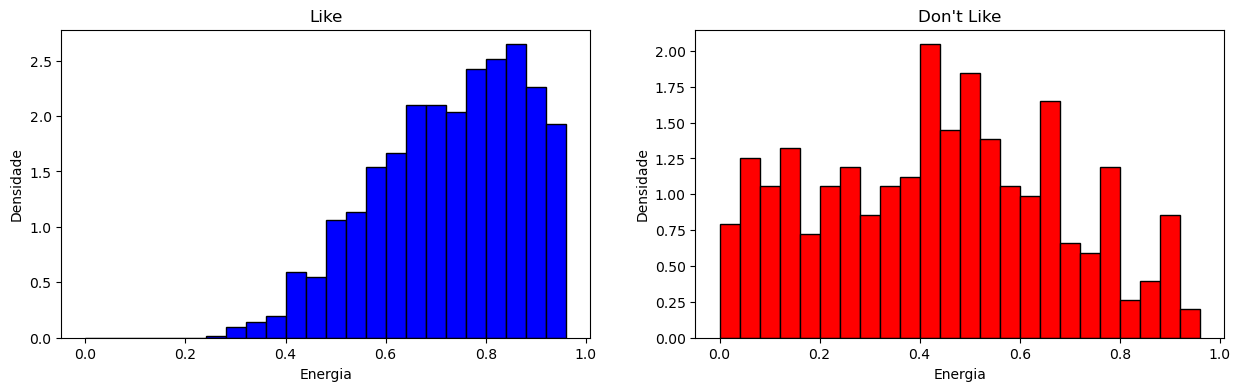

In [827]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(dados_1.loc[dados_1.liking == "Like", :].energy, density=True, bins=np.arange(0,1,0.04), color='blue', edgecolor='black')
plt.title("Like")
plt.ylabel("Densidade")
plt.xlabel("Energia")
plt.subplot(122)
plt.hist(dados_1.loc[dados_1.liking == "Dont Like", :].energy, density=True, bins=np.arange(0,1,0.04), color='red', edgecolor='black')
plt.title("Don't Like")
plt.ylabel("Densidade")
plt.xlabel("Energia")
plt.show()

<div id="q1_b"></div>

---

**b)** Interprete os histogramas do item anterior em termos da preferência de George. Existe alguma tendência ou orientação em suas preferências?

**Resposta a partir daqui**

In [828]:
# Sim, ele tende a gostar mais de músicas que tenham mais energia

<div id="q1_c"></div>

---

**c)** Observando o formato de cada histograma construído anteriormente e utilizando medidas de posição ou centralidade adequadamente, classifique como sendo simétrico, assimétrico a direita ou assimétrico a esquerda. Argumente claramente o motivo de sua classificação. 
Apresente as referidas medidas de posição (tendência central)

**Resposta a partir daqui**

In [829]:
dados_1.loc[dados_1.liking == "Like", :].energy.describe()

count    1636.000000
mean        0.737846
std         0.154438
min         0.256000
25%         0.630000
50%         0.756500
75%         0.862000
max         0.998000
Name: energy, dtype: float64

In [830]:
dados_1.loc[dados_1.liking == "Dont Like", :].energy.describe()

count    381.000000
mean       0.439961
std        0.244511
min        0.014800
25%        0.247000
50%        0.445000
75%        0.629000
max        0.965000
Name: energy, dtype: float64

**Análise das variáveis energy e loudness**

Neste item, considere as variáveis `energy` e `loudness` (utilize todas as faixas sem separar por `liking`).

A partir dos dados, faça:

<div id="q1_d"></div>

---
**d)** Apresente um **gráfico** adequado que permita visualizar  a associação entre as variáveis `energy` e `loudness`. Discuta se há uma associação aparente a partir do gráfico

**Resposta a partir daqui**

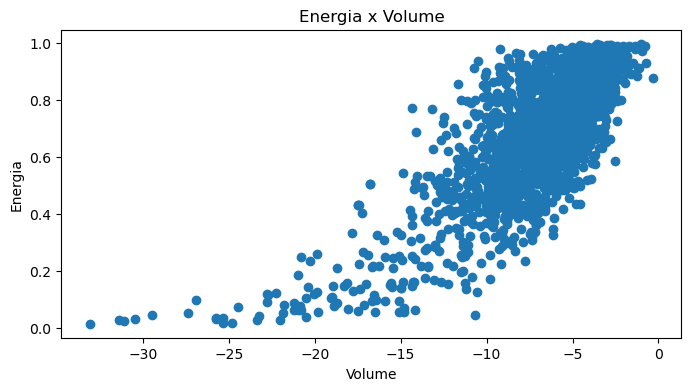

In [831]:
plt.figure(figsize=(8, 4))
plt.scatter(dados_1.loudness, dados_1.energy)
plt.title("Energia x Volume")
plt.xlabel("Volume")
plt.ylabel("Energia")
plt.show()

<div id="q1_e"></div>

---

**e)** Utilizando uma **medida-resumo** adequada, discuta o grau de associação dessas duas variáveis: `energy` e `loudness`.

**Resposta a partir daqui**

In [832]:
dados_1.loudness.corr(dados_1.energy)

0.7621769711494921

<div id="q2"></div>

___

#  Questão 2
### Dados da PNAD 2015

 

<font style="font-size:14pt" color="red">Mulher Brasileira Chefe de Família. Que Mulher é essa? </font>

Assuma que haja o interesse em descrever o perfil das mulheres casadas e chefes de família<sup>1</sup> no ano de 2015 contrapondo àquelas que também são casadas e trabalham, mas não assumem esse papel na família.

A base de dados que terá acesso traz informações exclusivamente de uma amostra restrita de mulheres casadas que possuem as seguintes características:

&#10004; Todas possuem **pelo menos um trabalho principal** no dia da pesquisa;

&#10004; São **todas casadas** e têm **idade entre 20 a 59 anos**;

&#10004; Todas possuem **rendimento do trabalho principal entre R\\$ 200,00 e R\\$ 5.000,00**;


&#10004; Cada mulher tem classificada **sua condição na família** bem definida na data da pesquisa: **Chefe** ou **Não chefe**.


<sup>1</sup>*Indivíduo que se declara como “pessoa de referência” na família.*


O arquivo **pnadMulher.xlsx** traz informações das seguintes variáveis: 


<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta2/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-BmbxuPwQa2lc/FVzBcNJ7UAyJxM6wuqIj61tLrc4wSX0szH/Ev+nYRRuWlolflfl" crossorigin="anonymous">

<div class="container">
    
- **REGIAO – indica a região de residência da mulher**
    * categorias: ('Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste') 

- **AREA – indica a situação censitária da residência da mulher**
    * categorias: ('Rural', 'Urbana') 

- **CONDFAM – corresponde a condição da mulher na famíli**
    * categorias: ('Chefe','Nao chefe') 

- **IDADE – idade da mulher**, em anos 

- **CORRACA – cor ou raça da mulher**
    * categorias: ('Indigena', 'Branca', 'Preta', 'Amarela', 'Parda') 

- **NATUNIAO – natureza da união**
    * categorias: ('Casamento civil e religioso', 'So casamento civil', 'So casamento religioso','Uniao consensual') 

- **NIVELINST – nível de instrução mais elevado alcançado pela mulher**
    * categorias: ('Sem instrucao', 'Fundamental incompleto', 'Fundamental completo',
    'Medio incompleto', 'Medio completo', 'Superior incompleto', 'Superior completo', 
    'Nao determinado') 

- **OCUPACAO – ocupação da mulher no trabalho principal**
    * categorias: ('Empregado', 'Trabalhador domestico', 'Conta propria', 'Empregador') 

- **ANOSTRAB – número de anos no trabalho principal**, em anos 

- **HORASTRABSEMANA – horas habitualmente trabalhadas por semana em todos os trabalhos**
    * categorias: ('Ate 14 horas', '15 a 39 horas', '40 a 44 horas', '45 a 48 horas', '49 horas ou mais') 

- **RENDTRABPRINC – rendimento mensal do trabalho principal da mulher**, em reais 

- **RENDTRABTODOS – rendimento mensal de todos os trabalhos da mulher**, em reais 

- **RENDFAMPERCAPITA – rendimento mensal familiar per capita – soma todas as rendas da família**, em reais

</div>



In [833]:
dados = pd.read_excel("arquivos/pnadMulher.xlsx")

In [834]:
dados.head()

,REGIAO,AREA,CONDFAM,IDADE,CORRACA,NATUNIAO,NIVELINST,OCUPACAO,ANOSTRAB,HORASTRABSEMANA,RENDTRABPRINC,RENDTRABTODOS,RENDFAMPERCAPITA
0,Norte,Urbana,Chefe,35,Parda,So casamento civil,Superior incompleto,Empregado,0,40 a 44 horas,880,880,793
1,Norte,Urbana,Chefe,34,Parda,Uniao consensual,Medio completo,Empregado,0,40 a 44 horas,790,790,818
2,Norte,Urbana,Nao chefe,51,Parda,So casamento civil,Medio completo,Empregador,11,40 a 44 horas,2000,2000,1716
3,Norte,Urbana,Nao chefe,20,Parda,Uniao consensual,Medio incompleto,Empregado,0,40 a 44 horas,850,850,666
4,Norte,Urbana,Chefe,49,Parda,Uniao consensual,Fundamental incompleto,Conta propria,9,45 a 48 horas,2500,2500,1662


In [835]:
dados.dtypes

REGIAO              object
AREA                object
CONDFAM             object
IDADE                int64
CORRACA             object
NATUNIAO            object
NIVELINST           object
OCUPACAO            object
ANOSTRAB             int64
HORASTRABSEMANA     object
RENDTRABPRINC        int64
RENDTRABTODOS        int64
RENDFAMPERCAPITA     int64
dtype: object

<div id="q2_a"></div>

___

#### Assuma que o objetivo para trabalhar com a base de dados aqui descrita seja: 

#### “Analisar se as mulheres com condição de chefe e de não chefe na família possuem o mesmo perfil com relação à idade”

**a)** Utilizando alguma ferramenta estatística que seja adequada, construa um **gráfico**  que permita analisar como a idade pode ser semelhante ou não entre as mulheres com condição de chefe e de não chefe na família. 
Ainda, interprete o gráfico em termos do problema (de forma clara e sucinta).


**Resposta:**

In [836]:
dados.loc[dados.CONDFAM == "Chefe", :].IDADE.describe()

count    7611.000000
mean       39.335961
std         9.524820
min        20.000000
25%        32.000000
50%        39.000000
75%        47.000000
max        59.000000
Name: IDADE, dtype: float64

In [837]:
dados.loc[dados.CONDFAM == "Nao chefe", :].IDADE.describe()

count    21169.000000
mean        38.852426
std          9.578980
min         20.000000
25%         31.000000
50%         38.000000
75%         46.000000
max         59.000000
Name: IDADE, dtype: float64

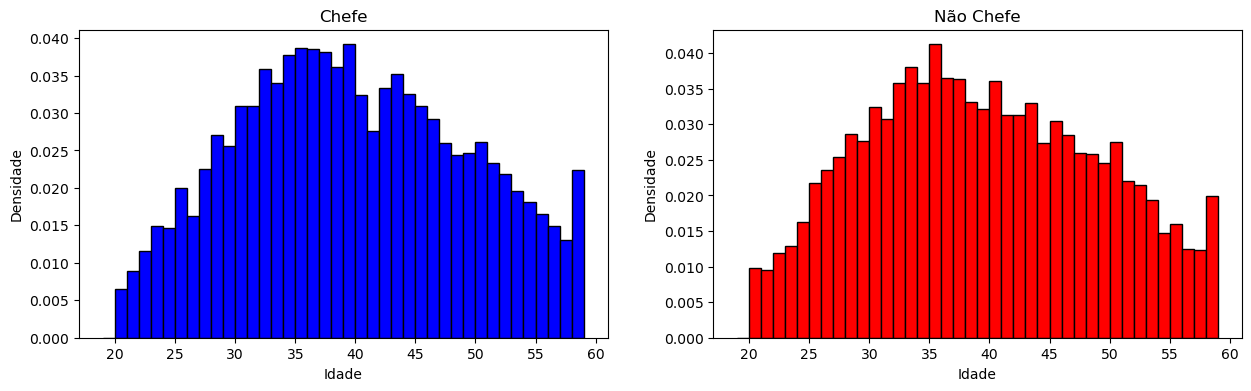

In [838]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(dados.loc[dados.CONDFAM == "Chefe", :].IDADE, density=True, bins=np.arange(19,60,1), color='blue', edgecolor='black')
plt.title("Chefe")
plt.ylabel("Densidade")
plt.xlabel("Idade")
plt.subplot(122)
plt.hist(dados.loc[dados.CONDFAM == "Nao chefe", :].IDADE, density=True, bins=np.arange(19,60,1), color='red', edgecolor='black')
plt.title("Não Chefe")
plt.ylabel("Densidade")
plt.xlabel("Idade")
plt.show()

<div id="q2_b"></div>

___

#### Assuma que o objetivo para trabalhar com a base de dados aqui descrita seja: 

#### Prever a renda mensal familiar per capita em função da renda mensal do trabalho principal da mulher com condição de chefe ne família.”.

**b)** Faça um gráfico adequado que permita visualizar como é a associação entre as variáveis renda mensal familiar per capita e renda mensal do trabalho principal, considerando apenas as mulheres com condição de chefe na família. Ainda, interprete o gráfico em termos do problema (de forma clara e sucinta).

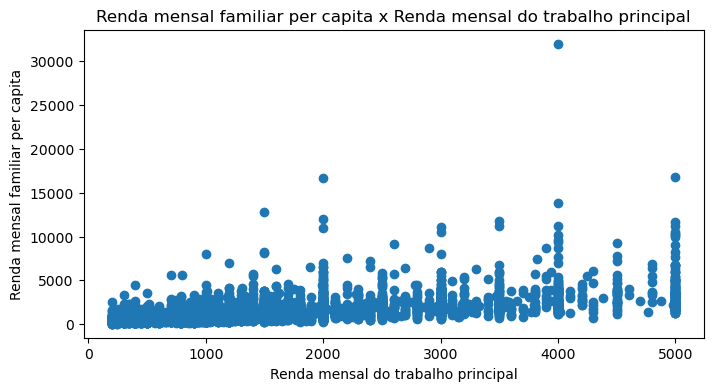

In [839]:
plt.figure(figsize=(8, 4))
plt.scatter(dados.loc[dados.CONDFAM == "Chefe", :].RENDTRABPRINC, dados.loc[dados.CONDFAM == "Chefe", :].RENDFAMPERCAPITA)
plt.title("Renda mensal familiar per capita x Renda mensal do trabalho principal")
plt.xlabel("Renda mensal do trabalho principal")
plt.ylabel("Renda mensal familiar per capita")
plt.show()

<div id="q2_c"></div>

___

**c)** Calcule uma medida adequada que permita interpretar o grau de associação entre as variáveis renda mensal familiar per capita e renda mensal do trabalho principal, considerando apenas as mulheres com condição de chefe na família. 
  

In [840]:
dados.loc[dados.CONDFAM == "Chefe", :].RENDTRABPRINC.corr(dados.loc[dados.CONDFAM == "Chefe", :].RENDFAMPERCAPITA)

0.6233913998885169

--- 

<div id="q3"></div>

# QUESTÃO 3
### Análise do ENEM

--- 



Esta parte da avaliação se baseia em uma amostra de dados do **ENEM 2017** adaptados para esta prova. O dicionario de dados encontra-se no link a seguir:

[Dicionário de dados](./arquivos/DATA_DIC.pdf)

In [841]:
filename = "arquivos/enem2017_30K.csv"
dados = pd.read_csv(filename, index_col=0)
dados.head(5)

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,CARRO,CELULAR,FIXO,COMPUTADOR,INTERNET,Q026,TIPO_EM,RENDA,NOTA_TESTES,NOTA_ENEM
171957,170003469518,MT,26.0,F,0.0,1,0,605.4,657.4,542.4,...,A,E,A,B,A,A,C,3020.091575,2430.9,2990.9
127898,170005286919,CE,17.0,M,0.0,2,0,698.5,649.0,630.6,...,C,B,A,B,B,B,D,3611.589780,2817.1,3677.1
132925,170005113172,MA,21.0,M,0.0,1,0,591.0,643.8,597.9,...,A,D,A,B,B,A,A,1375.454182,2385.8,3325.8
119870,170005346442,PR,17.0,F,0.0,2,0,525.6,441.2,509.4,...,B,C,A,B,B,B,A,2079.516469,1930.0,2450.0
122904,170004476042,DF,26.0,F,0.0,1,0,538.0,408.8,523.9,...,B,C,A,A,A,A,A,1364.095119,1921.8,2381.8


<div id="q3_a"></div>

**a)** Apresente uma tabela cruzada que mostre a escolaridade do pai cruzada com o tipo do ensino médio. Aponte a combinação de categorias mais frequente e, baseado no dicionário de dados, explique o que são. 

In [842]:
dados.TIPO_EM = dados.TIPO_EM.astype('category')
dados.ESC_PAI = dados.ESC_PAI.astype('category')

In [843]:
pd.crosstab(dados.TIPO_EM, dados.ESC_PAI, normalize='all')*100

ESC_PAI,A,B,C,D,E,F,G,H
TIPO_EM,,,,,,,,
A,5.033333,20.523333,13.223333,10.450000,18.220000,3.033333,1.193333,7.643333
B,0.063333,0.393333,0.356667,0.423333,1.220000,0.420000,0.253333,0.250000
C,0.056667,0.260000,0.206667,0.170000,0.483333,0.113333,0.056667,0.090000
D,0.063333,0.436667,0.630000,0.996667,4.466667,3.333333,2.653333,0.443333
E,0.046667,0.253333,0.273333,0.320000,1.070000,0.460000,0.256667,0.160000


<div id="q3_b"></div>

**b)** Baseado nos dados, encontre a idade da mulher mais idosa que prestou a prova 

In [844]:
dados.loc[dados.TP_SEXO == 'F', :].NU_IDADE.max()

74.0

<div id="q3_c"></div>

**c)** Avalie a afirmação: pessoas com mais renda tendem a ir melhor no ENEM 

É necessário:

* realizar o plot de dispersão renda versus pontuação

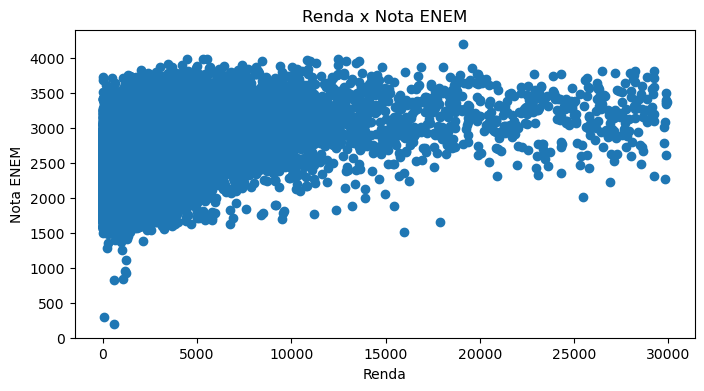

In [845]:
plt.figure(figsize=(8, 4))
plt.scatter(dados.RENDA, dados.NOTA_ENEM)
plt.title("Renda x Nota ENEM")
plt.xlabel("Renda")
plt.ylabel("Nota ENEM")
plt.show()

In [846]:
dados.RENDA.corr(dados.NOTA_ENEM)

0.40819007923966083

<div id="q3_d"></div>

**d)** Compare as várias categorias do ensino médio. Use um recurso gráfico que permita visualizar a distribuição das notas do ENEM comparando as categorias de ensino médio.

---

<div id="kaggle"></div>

# KAGGLE:


<img src="arquivos/img/kaggle.png" >

O [Kaggle.com](https://www.kaggle.com/competitions) é um site de competições internacionais de Data Science no qual empresas oferecem prêmios para os analistas que fizerem a melhor modelagem preditiva de diversos problemas.

Em uma das competições recente, o desafio era:

>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

A seguir, vocês receberão um conjunto de dados bem menor em termos de número de variáveis disponível no Kaggle.



## SIGNIFICADO DAS VARIÁVEIS

A base de dados que terão acesso traz informações de 1460 imóveis cujas variáveis selecionadas possuem as seguintes descrições traduzidas (mantendo os nomes das variáveis e das categorias do problema original - em inglês):



&#10004; **Id:** número que identifica o imóvel na base de dados.

&#10004; **SalePrice:** preço de venda da propriedade (em dólares). Ess
a é a variável alvo que você irá tentar predizer.

&#10004; **Foundation:** tipo de fundação, com as seguintes categorias:
- BrkTil -  Tijolo e telha
- CBlock -  Bloco de concreto
- PConc -  Concreto usinado
- Slab -  Laje
- Stone -  Pedra
- Wood -  Madeira


&#10004; **OverallQual**: avalia de maneira geral o material e o acabamento da casa, com as seguintes categorias: 
- Very Poor - Péssimo
- Poor - Ruim
- Fair - Justo
- Below Average - Abaixo da média
- Average - Médio
- Above Average - Acima da média
- Good - Bom
- Very Good - Muito bom
- Excellent - Excelente
- Very Excellent - Muito excelente

&#10004; **LotArea:** tamanho do lote (em pés quadrados).

&#10004; **X1stFlrSF:** tamanho do primeiro andar (em pés quadrados).

&#10004; **X2ndFlrSF:** tamanho do segundo andar (em pés quadrados).

&#10004; **GarageCars:** tamanho da garagem em capacidade de carros (número de carros).

&#10004; **Fireplaces:** número de lareiras.

&#10004; **Street:** tipo de acesso rodoviário à propriedade, com as seguintes categorias:
- Grvl - Cascalho
- Pave - Pavimentado

&#10004; **LandSlope:** inclinação da propriedade, com as seguintes categorias:
- Gtl - inclinação suave
- Mod - inclinação moderada
- Sev - severo decline

&#10004; **RoofStyle:** tipo do telhado, com as seguintes categorias:
- Flat - Telhado plano
- Gable - Telhado de duas águas
- Gambrel - Telhado estilo celeiro
- Hip - Telhado de ripa
- Mansard - Mansarda
- Shed - Galpão

&#10004; **CentralAir:** ar condicionado central, com as seguintes categorias:
- N - Não
- Y - Sim

&#10004; **YearBuilt:** ano da construção do imóvel.

&#10004; **YrSold:** ano de venda do imóvel.

O arquivo <house.xlsx > traz todas essas 15 variáveis.

In [847]:
dados = pd.read_excel("arquivos/house.xlsx")

In [848]:
dados.head()

,SalePrice,Foundation,OverallQual,LotArea,X1stFlrSF,X2ndFlrSF,GarageCars,Fireplaces,Street,LandSlope,RoofStyle,CentralAir,YearBuilt,YrSold
0,208500,PConc,Good,8450,856,854,2,0,Pave,Gtl,Gable,Y,2003,2008
1,181500,CBlock,Above Average,9600,1262,0,2,1,Pave,Gtl,Gable,Y,1976,2007
2,223500,PConc,Good,11250,920,866,2,1,Pave,Gtl,Gable,Y,2001,2008
3,140000,BrkTil,Good,9550,961,756,3,1,Pave,Gtl,Gable,Y,1915,2006
4,250000,PConc,Very Good,14260,1145,1053,3,1,Pave,Gtl,Gable,Y,2000,2008


In [849]:
dados.dtypes

SalePrice       int64
Foundation     object
OverallQual    object
LotArea         int64
X1stFlrSF       int64
X2ndFlrSF       int64
GarageCars      int64
Fireplaces      int64
Street         object
LandSlope      object
RoofStyle      object
CentralAir     object
YearBuilt       int64
YrSold          int64
dtype: object

In [850]:
dados.Foundation = dados.Foundation.astype('category')
dados.OverallQual = dados.OverallQual.astype('category')
dados.Street = dados.Street.astype('category')
dados.LandSlope = dados.LandSlope.astype('category')
dados.RoofStyle = dados.RoofStyle.astype('category')
dados.CentralAir = dados.CentralAir.astype('category')

dados.Foundation.cat.categories = (['BrkTil','CBlock','PConc','Slab','Stone','Wood'])
dados.OverallQual.cat.categories = (['Very Poor','Poor','Fair','Below Average','Average',
                                     'Above Average','Good','Very Good','Excellent','Very Excellent'])

dados.Street.cat.categories = (['Grvl','Pave'])
dados.LandSlope.cat.categories = (['Gtl','Mod','Sev'])
dados.RoofStyle.cat.categories = (['Flat','Gable','Gambrel','Hip','Mansard','Shed'])
dados.CentralAir.cat.categories = (['N','Y'])


C:\Users\PH\AppData\Local\Temp\ipykernel_7692\2871752144.py:8: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  dados.Foundation.cat.categories = (['BrkTil','CBlock','PConc','Slab','Stone','Wood'])
C:\Users\PH\AppData\Local\Temp\ipykernel_7692\2871752144.py:9: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  dados.OverallQual.cat.categories = (['Very Poor','Poor','Fair','Below Average','Average',
C:\Users\PH\AppData\Local\Temp\ipykernel_7692\2871752144.py:12: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  dados.Street.cat.categories = (['Grvl','Pave'])
C:\Users\PH\AppData\Local\Temp\ipykernel_7692\2871752144.py:13: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  dados.LandSlope.ca

<div id="q4"></div>

___
# Questão 4

<div id="q4_a"></div>

---
#### Assuma que o objetivo para trabalhar com a base de dados acima seja: “Analisar como uma determinada variável pode impactar sobre o preço de vendas de um imóvel”.

**a)** Utilizando alguma ferramenta estatística (**gráfica**) que seja adequada, analise como a presença ou não de ar central no imóvel (variável `CentralAir`) pode impactar sobre preço de vendas de um imóvel (variável `SalePrice`). A interpretação precisa ser completa PORÉM sucinta.


<div id="q4_b"></div>

___

#### Assuma que o objetivo para trabalhar com a base de dados acima seja: “Analisar como uma determinada variável pode impactar sobre o preço de vendas de um imóvel”.

**b)** Utilizando alguma ferramentas estatísticas (**numérica** E **gráfica**) que sejam adequadas, analise como o tamanho de área construída do primeiro andar do imóvel (variável `X1stFlrSF`) pode impactar sobre preço de vendas do mesmo (variável `SalePrice`). A interpretação precisa ser completa PORÉM sucinta.


<div id="q4_c"></div>

___

**c)** Como você verificaria a seguinte afirmação: *Os imóveis sem ar central possuem a mesma qualidade geral de material e de acabamento quando comparados com imóveis que possuem ar central*?

Obs: Considere as variáveis `CentralAir` e `OverallQual` para responder a pergunta acima.